# Analysis of the data generated by Picoscope

Shinning a 532nm green laser pulse onto 2 optical mirrors helps efficiently focus its path. Some parts of the laser is deflected into a detector, the output of this will reveal the strength of the laser pulse in $mV$, this value is represented in channel 3. The light that passes hits the mirror which directs it to a focusing lens and the laser interacts with the targetted object, in this case, a water sample held in a cuvette. However, it is possible that the light passes through that mirror such that they never reach the target object, they become residual green light and is detected by the photomultiplier(PMT) connected to channel 1 of picoscope.

Most of the light does contact with the object, after interaction resulting in energy transfer, they are put through a 50-50 beamsplitter and detected by 2 different PMTs, one of larger focal size than the other in channel 2 and 4.

All this data is collected, downloaded with picoscope and analysed below.

<img src="Set up.jpg" alt="drawing" width="300"/> 

                                                            Figure(1)

In [1]:
#import useful files
import statistics as stat
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#file path with glob
path = "Picoscope_files/"
all_files = glob.glob(path + "*.csv")

In [3]:
#shows all selected files once comma is removed
all_files;

In [4]:
#turn all 512 files into lists
var = [pd.read_csv(filename,index_col=None,header=0) for filename in all_files]

In [5]:
#show the first list
var[0]

,Time,Channel A,Channel B,Channel C,Channel D
0,(ns),(mV),(mV),(mV),(V)
1,-15.30980383,0.00000000,-0.01537894,3.81397600,0.00784326
2,-15.22980382,-0.01537894,-0.16916830,3.66018700,0.00784326
3,-15.14980382,0.00000000,-0.49212600,3.59867100,0.00787402
4,-15.06980382,0.00000000,-0.92273620,3.59867100,0.00790477
...,...,...,...,...,...
656,37.09019687,2.52214600,-2.04539800,6.78211100,0.00836614
657,37.17019688,3.01427100,-2.69131400,7.32037400,0.00821235
658,37.25019688,3.44488200,-3.24495600,7.72022600,0.00805856
659,37.33019688,3.73708200,-3.66018700,7.93553100,0.00793553


In [6]:
#concat all lists and turn into 1 big dataframe
dataframe = pd.concat(var,axis=0,ignore_index=True)

In [7]:
#renaming the headers (they came as Channel 1,2,3,4 - need to know what they represent)
rename = ['Time','Green Light Residual','PMT 1 - smaller Focal Receptor', 'Green Light Pulse','PMT 2 - Larger Focal receptor']
dataframe.columns = rename

In [8]:
#identify the type of the dataframe columns
dataframe.dtypes

Time                              object
Green Light Residual              object
PMT 1 - smaller Focal Receptor    object
Green Light Pulse                 object
PMT 2 - Larger Focal receptor     object
dtype: object

Clear to see that all the dataframe columns are of type object due to default setting. To perform any graphing or data analysis we will need to convert the type into floats.

In [9]:
#observe the dataframe
dataframe

,Time,Green Light Residual,PMT 1 - smaller Focal Receptor,Green Light Pulse,PMT 2 - Larger Focal receptor
0,(ns),(mV),(mV),(mV),(V)
1,-15.30980383,0.00000000,-0.01537894,3.81397600,0.00784326
2,-15.22980382,-0.01537894,-0.16916830,3.66018700,0.00784326
3,-15.14980382,0.00000000,-0.49212600,3.59867100,0.00787402
4,-15.06980382,0.00000000,-0.92273620,3.59867100,0.00790477
...,...,...,...,...,...
338427,37.17575787,2.21456700,2.44525100,3.64480800,0.01184178
338428,37.25575788,2.67593500,2.82972400,3.59867100,0.01076526
338429,37.33575788,3.10654500,3.19881900,3.59867100,0.00971949
338430,37.41575788,3.49101900,3.52177600,3.66018700,0.00882751


From above, we can see that some of the rows will have (ns) (mV) (V) which are the units brought in as they were in the original excel sheet. We need to remove them so our dataframe can be of type float only.

In [10]:
#Axe all the rows that have the units i.e. remove the strings/objects
clean_dataframe = dataframe.drop(dataframe[dataframe['Time'] == '(ns)'].index)

In [11]:
#checking we got rid of the right amount of rows
axed_data = dataframe.shape[0] - clean_dataframe.shape[0] 
print(axed_data,'rows has been removed from original dataframe.')

512 rows has been removed from original dataframe.


Exactly 512 rows have been removed from the original dataframe, we can be confident that we have not removed extra useful data points as there are 512 excel sheets which were brought in and each had 1 row that had all the units.

Finally, we can actually change the type of the dataframe:

In [12]:
#change the data type
Clean_dataframe = clean_dataframe.astype(float)

Always begin with a description of the numerical dataframe

In [13]:
#describe the dataframe
Clean_dataframe.describe()

,Time,Green Light Residual,PMT 1 - smaller Focal Receptor,Green Light Pulse,PMT 2 - Larger Focal receptor
count,337920.000000,337920.000000,337920.000000,337920.000000,337920.000000
mean,10.932035,-28.342100,-26.943624,10.646960,-0.025649
std,15.243315,92.236703,82.261846,38.517515,0.113499
min,-16.000000,-496.970300,-483.313800,-24.883120,-0.736805
25%,-2.264616,-7.258858,-8.120078,3.598671,-0.000185
50%,10.935385,-1.568651,-3.921629,3.937008,0.006213
75%,24.135385,0.276821,-0.492126,4.290723,0.007905
max,37.510001,31.526820,37.586120,376.953100,0.031312


We need all our units to be constant before plotting, so we must change PMT 2 from $V$ into $mV$.

In [14]:
#Create a new column called PMT 2 which is the column PMT 2 - Larger Focal Length but in mV
uniform_dataframe=Clean_dataframe.assign(PMT2 = Clean_dataframe['PMT 2 - Larger Focal receptor']*1000)

Below we will make a plot to look at the general distribution of data, it is just to obtain a general/rough idea on what the dataframe provides

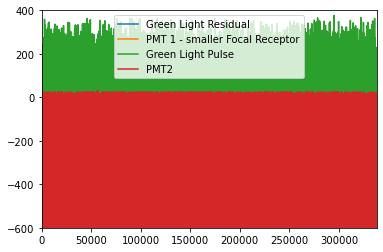

In [15]:
#Show me all pulses, note:x axis is index, not time - yet
plot_columns = ['Green Light Residual','PMT 1 - smaller Focal Receptor', 'Green Light Pulse','PMT2']
uniform_dataframe[plot_columns].plot()

ax = plt.gca()
ax.set(xlim = (0,uniform_dataframe.shape[0]), ylim = (-600,400))
plt.show()

Great, we saw absolutely nothing, instead we rename the column, change the Time column to be our index and replot the graph to get a better visual

In [16]:
#delete the column in the wrong units
del uniform_dataframe['PMT 2 - Larger Focal receptor']

In [17]:
#rename the uniform columns
uniform_dataframe.rename(columns={'PMT2': 'PMT 2 - Larger Focal Receptor', 'PMT 1 - smaller Focal Receptor':'PMT 1 - Smaller Focal Receptor'}, inplace=True)

In [18]:
#Setting the Time as the index column
uniform_dataframe.set_index("Time",drop=True,inplace=True)

In [19]:
uniform_dataframe.head()

,Green Light Residual,PMT 1 - Smaller Focal Receptor,Green Light Pulse,PMT 2 - Larger Focal Receptor
Time,,,,
-15.309804,0.000000,-0.015379,3.813976,7.84326
-15.229804,-0.015379,-0.169168,3.660187,7.84326
-15.149804,0.000000,-0.492126,3.598671,7.87402
-15.069804,0.000000,-0.922736,3.598671,7.90477
-14.989804,0.000000,-1.430241,3.644808,7.90477


Now we will replot the graph with all datapoints overlapping eachother and with the correct axis:

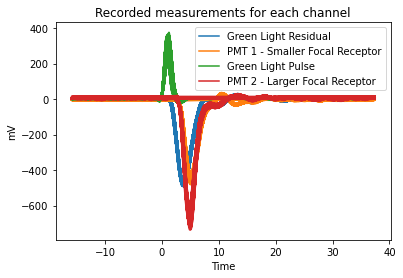

In [20]:
#Show me a pulse with time as the x axis
import matplotlib.ticker as mtick
plot_columns = ['Green Light Residual','PMT 1 - Smaller Focal Receptor', 'Green Light Pulse','PMT 2 - Larger Focal Receptor']
uniform_dataframe[plot_columns].plot()

plt.xlabel('Time')
plt.ylabel('mV')
plt.title('Recorded measurements for each channel')
plt.show()

#### Theory of light pulse and detection time
We need to dive deeper into the information. We want to find the relationship between maximums of each pulse and the time of their occurance, we expect to see for a peak with larger voltage i.e. stronger pulse, the time of its occurance to come faster (lower nanoseconds). Therefore, the expected graph should show some form of negative linear distribution. 

To begin, we must rename our columns to do that (spaces are not good for dataframe accessing).

In [21]:
#Renaming the dataframe into better names for analysis - spaces aren't good!
uniform_dataframe.rename(columns={'PMT 2 - Larger Focal Receptor': 'Larger_Focal_Receptor', 
                                                  'PMT 1 - Smaller Focal Receptor':'PMT_1_Smaller_Focal_Receptor',
                                                  'Green Light Residual':'Green_Light_Residual',
                                                    'Green Light Pulse':'Green_Light_Pulse'}, inplace=True)

In [22]:
#New column names ready for analysis
uniform_dataframe.head()

,Green_Light_Residual,PMT_1_Smaller_Focal_Receptor,Green_Light_Pulse,Larger_Focal_Receptor
Time,,,,
-15.309804,0.000000,-0.015379,3.813976,7.84326
-15.229804,-0.015379,-0.169168,3.660187,7.84326
-15.149804,0.000000,-0.492126,3.598671,7.87402
-15.069804,0.000000,-0.922736,3.598671,7.90477
-14.989804,0.000000,-1.430241,3.644808,7.90477


We need to split our giant dataframe of roughly 400000 rows into 512 dataframes of 660 rows that represent the data collected by picoscope of each individual laser pulse. Note that our final dataframe would be at 511 as python starts counting at 0. Ultimately, we want to obtain a list of Maximum voltages of each laser pulse and the time that they occur, inside the code, they are represented as localMaxVoltage and localMaxVoltageTime respectively.

In [23]:
#Split the large dataframe into 511 smaller dataframes
def split_dataframe_by_position(df, splits):
    dataframes = []
    index_to_split = len(df) // splits
    start = 0
    end = index_to_split
    for split in range(splits):
        temporary_df = df.iloc[start:end, :]
        dataframes.append(temporary_df)
        start += index_to_split
        end += index_to_split
    return dataframes
split_dataframes = split_dataframe_by_position(uniform_dataframe, 512)
#Test if our split is working
print('Quick test, the max value of the last dataframe = ',split_dataframes[511].Green_Light_Pulse.max())

Quick test, the max value of the last dataframe =  291.4616


In [24]:
#For loop puts all the local Max Voltages into an empty list called localMaxVoltages and the Time of that occurance
localMaxVoltage = []
localMaxVoltageTime = []
i = 0
for i in range(0,511,1):
    localMaxVoltage.append(split_dataframes[i].Green_Light_Pulse.max())
    localMaxVoltageTime.append(split_dataframes[i].Green_Light_Pulse.idxmax())

Great, we have now 2 lists, a list of the Maximum voltages of each laser pulse (in millivolts) and its corresponding time (in nanoseconds). Below we will analyse both of these lists, displaying their:
- Length Count
- Maximum
- Minimum
- Mean
- Median
- Standard Deviation

In [25]:
#Quick analysis of the local Max Voltages
print('Length of the list of Max Voltages: {0} '.format(len(localMaxVoltage)))
print('Maximum of Max Voltages: {0} mV'.format(max(localMaxVoltage)))
print('Minimum of Max Voltages: {0} mV'.format(min(localMaxVoltage)))
print('Mean of Max Voltages: {0} mV'.format(stat.mean(localMaxVoltage)))
print('Median of Max Voltages: {0} mV'.format(stat.median(localMaxVoltage)))
print('Standard Deviation of Max voltages: {0} mV'.format(stat.stdev(localMaxVoltage)))

Length of the list of Max Voltages: 511 
Maximum of Max Voltages: 376.9531 mV
Minimum of Max Voltages: 212.137 mV
Mean of Max Voltages: 290.2603240704501 mV
Median of Max Voltages: 290.6619 mV
Standard Deviation of Max voltages: 38.712736635497116 mV


In [26]:
#Quick analysis of the time of local Max Voltages
print('Length of the list of Time: {0} '.format(len(localMaxVoltageTime)))
print('Maximum Time of Max Voltages: {0} ns'.format(max(localMaxVoltageTime)))
print('Minimum Time of Max Voltages: {0} ns'.format(min(localMaxVoltageTime)))
print('Time of Mean of Max Voltages: {0} ns'.format(stat.mean(localMaxVoltageTime)))
print('Time of Median of Max Voltages: {0} ns'.format(stat.median(localMaxVoltageTime)))
print('Standard Deviation of Time of Max voltages: {0} ns'.format(stat.stdev(localMaxVoltageTime)))

Length of the list of Time: 511 
Maximum Time of Max Voltages: 1.3764104 ns
Minimum Time of Max Voltages: 0.72727239 ns
Time of Mean of Max Voltages: 1.0539841980626223 ns
Time of Median of Max Voltages: 1.07272739 ns
Standard Deviation of Time of Max voltages: 0.19825085976277426 ns


### Plotting
Now that we have a general understanding of our dataset, we can plot them in various ways to extract more information. The first is a scatterplot of the maximum voltage of each pulse along with the time of occurance.

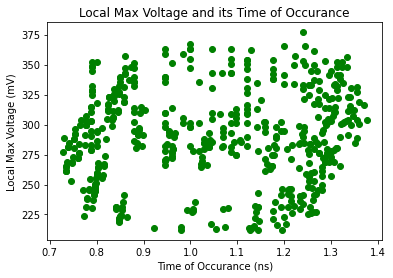

In [27]:
#Scatterplot of the local Max Voltage value and its Time of occurance
plt.scatter(localMaxVoltageTime,localMaxVoltage, c = 'g')

plt.xlabel('Time of Occurance (ns)')
plt.ylabel('Local Max Voltage (mV)')
plt.title('Local Max Voltage and its Time of Occurance')
plt.show()

Immediately we notice a few abnormalities:
 - existance of outlier
 - circular distribution
 
Since we have taken 512 samples, we can almost ignore the outlier.

Now to the main problem! In theory, for a peak to be higher than another i.e. stronger pulse or larger voltage, we expect the time of its occurance to come faster as stated above. Therefore, the expected graph should show some form of negative linear distribution. 

Instead, we are met with something close to a circular distribution with clustering in 3 regions for maximum voltage, two small clusters around 225mV, 350mV and a large cluster at 290mV. This is not to be expected at all.

Further, there is also clustering for the time of their occurance, the clustering exists near 0.8 ns and 1.3 ns. 

Both of these clusterings are exemplified by the histograms below:

Using a high sensitivity to change (bins = 50) we can clearly see in 'Distribution of maximum voltages - Higher Sensitivity' that there are 2 small peaks on either side of the large central peak. In addition, there is also indication of a flat line between 200mV to 260mV (shown more clearly in 'Distribution of maximum voltages'), this could be due to the triggering voltage, as the triggering voltage was roughly 200mV so the tail of the histogram could be cut off by this or it could be an indication of a larger issue. This doesn't make sense as we expect to see a regular gaussian distribution.

In 'Distribution of Time', we again see very clearly the clustering 2 clustering mentioned above. In addition, there is also something potentially happening close to the centre of the histogram (shown more clearly in the higher sensitivity graph), perhaps a third peak. Which does not make sense, again, we expect a single gaussian distribution.

So it seems that according to our results, there is no relationship between pulse peak and its time of occurance. Which is an issue as our results doesn't coincide with our theory, our standard deviation is another strong indicator of that and with the variance being the square of the standard deviation, we have a variance close to 1500, which is a strong warning something is wrong.

To truely reason with these unusual occurances, we may probably need a larger data set. A dataset of 512 samples may not be enough to see a true distribution.

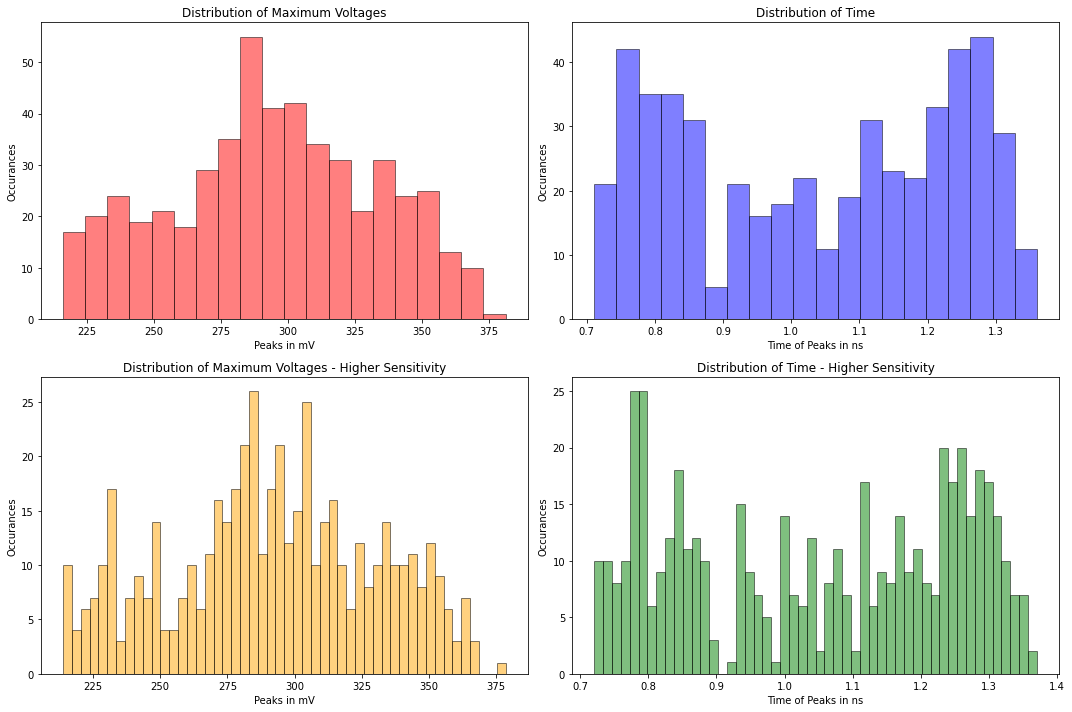

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
axes[0,0].hist(localMaxVoltage, bins=20, align = 'right', color='red', edgecolor='black', alpha = 0.5)
axes[1,0].hist(localMaxVoltage, bins=50, align = 'right', color='orange', edgecolor='black',alpha = 0.5)
axes[0,1].hist(localMaxVoltageTime, bins=20, align = 'left', color='blue', edgecolor='black', alpha = 0.5)
axes[1,1].hist(localMaxVoltageTime, bins=50, align = 'left', color='green', edgecolor='black', alpha = 0.5)

axes[0,0].set(ylabel = 'Occurances',xlabel = 'Peaks in mV',title = 'Distribution of Maximum Voltages')
axes[1,0].set(ylabel = 'Occurances',xlabel = 'Peaks in mV',title = 'Distribution of Maximum Voltages - Higher Sensitivity')
axes[0,1].set(ylabel = 'Occurances',xlabel = 'Time of Peaks in ns',title = 'Distribution of Time')
axes[1,1].set(ylabel = 'Occurances',xlabel = 'Time of Peaks in ns',title = 'Distribution of Time - Higher Sensitivity')

fig.tight_layout()
plt.show()

#### Theory and data exploration
Intuitively, our next analysis would be looking for a relation between the individual maximum peak values to the green light residual peak. We expect that for a stronger laser pulse, there will be more residual green light being detected creating a positive relationship between them.

Having already split the data above, we simply needed to slightly modify the code to find the largest value for the Residual. It is important to note that all values be negative (or 0) as the gaussian is upside down proportional to the Green Light Pulse, so we will need to absolute the minimum value to obtain the peak of the residual green light.

In [29]:
#For loop puts all the local Min Voltages into an empty list called localMinVoltages and the Time of that occurance
localMaxVoltageResid = []
localMaxVoltageResidTime = []
i = 0
for i in range(0,511,1):
    localMaxVoltageResid.append(split_dataframes[i].Green_Light_Residual.min())
    localMaxVoltageResidTime.append(split_dataframes[i].Green_Light_Residual.idxmin())

In [30]:
#Obtain absolute value of the arrays
absoluteResid = np.array(localMaxVoltageResid)*-1;

In [31]:
#Quick analysis of the local Min Voltages - Green Light Residual
print('Length of the list of Max Voltages for Residual Light: {0} '.format(len(absoluteResid)))
print('Maximum of Max Voltages for Residual Light: {0} mV'.format(max(absoluteResid)))
print('Minimum of Max Voltages for Residual Light: {0} mV'.format(min(absoluteResid)))
print('Mean of Max Voltages for Residual Light: {0} mV'.format(stat.mean(absoluteResid)))
print('Median of Max Voltages for Residual Light: {0} mV'.format(stat.median(absoluteResid)))
print('Standard Deviation of Max voltages for Residual Light: {0} mV'.format(stat.stdev(absoluteResid)))

Length of the list of Max Voltages for Residual Light: 511 
Maximum of Max Voltages for Residual Light: 496.9703 mV
Minimum of Max Voltages for Residual Light: 469.1345 mV
Mean of Max Voltages for Residual Light: 481.8478880626223 mV
Median of Max Voltages for Residual Light: 482.0527 mV
Standard Deviation of Max voltages for Residual Light: 6.566817882009876 mV


In [32]:
#Quick analysis of the time of local Min Voltages - Green Light Residual
print('Length of the list of Time: {0} '.format(len(localMaxVoltageResidTime)))
print('Maximum Time of Min Voltages: {0} ns'.format(max(localMaxVoltageResidTime)))
print('Minimum Time of Min Voltages: {0} ns'.format(min(localMaxVoltageResidTime)))
print('Time of Mean of Min Voltages: {0} ns'.format(stat.mean(localMaxVoltageResidTime)))
print('Time of Median of Min Voltages: {0} ns'.format(stat.median(localMaxVoltageResidTime)))
print('Standard Deviation of Time of Min voltages: {0} ns'.format(stat.stdev(localMaxVoltageResidTime)))

Length of the list of Time: 511 
Maximum Time of Min Voltages: 4.01500043 ns
Minimum Time of Min Voltages: 3.52000044 ns
Time of Mean of Min Voltages: 3.8060781674951074 ns
Time of Median of Min Voltages: 3.83255843 ns
Standard Deviation of Time of Min voltages: 0.11210993564103292 ns


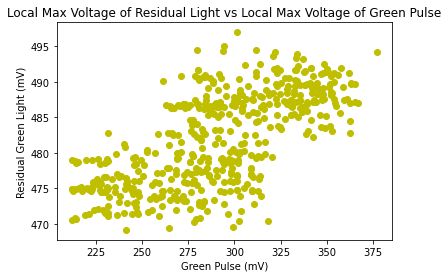

In [33]:
#Scatterplot of the local Max Voltage value and its Time of occurance for the Residual Light
plt.scatter(localMaxVoltage,absoluteResid, c = 'y')

plt.xlabel('Green Pulse (mV)')
plt.ylabel('Residual Green Light (mV)')
plt.title('Local Max Voltage of Residual Light vs Local Max Voltage of Green Pulse')
plt.show()

Predicted by the theory, the stronger the green pulse, the more residual light is detected. Therefore, we can clearly see that a positive near linear relation is formed between maximum pulse and the maximum residual light.

Now lets look at the peak of the residual light compared to the time of occurance, we should observe a positive near linear relationship. This is to be expected because the pulses are all triggered using the same voltage (or millivoltage) represented as 1 in the image below. Assuming that the peak of the smaller gaussian occurs at $t$, then the peak of the larger gaussian occurs at $t+t_{0}$.

<img src="Difference in peaks.jpg" alt="drawing" width="200"/> 

                                                            Figure(2)

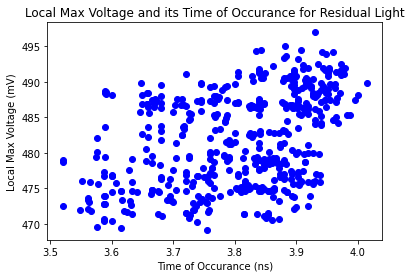

In [34]:
#Scatterplot of the local Max Voltage value and its Time of occurance for the Residual Light
plt.scatter(localMaxVoltageResidTime,absoluteResid, c = 'b')

plt.xlabel('Time of Occurance (ns)')
plt.ylabel('Local Max Voltage (mV)')
plt.title('Local Max Voltage and its Time of Occurance for Residual Light')
plt.show()

Verified by our plot above, we do observe a positive near linear relationship!